# Metadata Analysis for Flood Datasets on NYC Open Data
Author: Mark Bauer

### Goal: Examine metadata (e.g., download counts, page views, etc.) for datasets related to flooding on NYC Open Data.

# Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from datetime import datetime, timezone
import requests

Documention for installing watermark: https://github.com/rasbt/watermark.

In [2]:
# reproducibility
%reload_ext watermark
%watermark -t -d -v -p pandas,numpy,matplotlib,seaborn,requests

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.6.0

pandas    : 1.5.1
numpy     : 1.23.4
matplotlib: 3.6.2
seaborn   : 0.12.1
requests  : 2.28.1



# Socrata Discovery API
I used the Socrata [Discovery API](https://dev.socrata.com/docs/other/discovery#?route=overview) to retrieve metadata for datasets on NYC Open Data.

In [3]:
# Discovery API
url = 'https://api.us.socrata.com/api/catalog/v1?search_context=data.cityofnewyork.us&limit=50000'

# fetch the JSON data from the web
response = requests.get(url)

# parse the JSON response
data_dict = response.json() 

# preview keys    
data_dict.keys() 

dict_keys(['results', 'resultSetSize', 'timings', 'warnings'])

In [4]:
# convert results into df
metadata_df = pd.DataFrame.from_records(data_dict['results'])

# sanity check
print(metadata_df.shape)
metadata_df.head()

(3195, 8)


,resource,classification,metadata,permalink,link,owner,creator,preview_image_url
0,"{'name': 'For Hire Vehicles (FHV) - Active', '...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/8wbx-tsch,https://data.cityofnewyork.us/Transportation/F...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
1,"{'name': 'Civil Service List (Active)', 'id': ...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/vx8i-nprf,https://data.cityofnewyork.us/City-Government/...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
2,"{'name': 'DOB Job Application Filings', 'id': ...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/ic3t-wcy2,https://data.cityofnewyork.us/Housing-Developm...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
3,"{'name': 'TLC New Driver Application Status', ...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/dpec-ucu7,https://data.cityofnewyork.us/Transportation/T...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
4,{'name': 'For Hire Vehicles (FHV) - Active Dri...,"{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/xjfq-wh2d,https://data.cityofnewyork.us/Transportation/F...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN


In [5]:
# convert resource key to a dataframe
metadata_df = pd.DataFrame.from_records(metadata_df['resource'])

# sanity check
print(metadata_df.shape)
metadata_df.head()

(3195, 27)


,name,id,resource_name,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,...,columns_description,columns_format,download_count,provenance,lens_view_type,lens_display_type,locked,blob_mime_type,hide_from_data_json,publication_date
0,For Hire Vehicles (FHV) - Active,8wbx-tsch,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2025-02-14T19:58:23.000Z,...,"[Base Name, Base Telephone NumberBase Telephon...","[{'displayStyle': 'plain', 'align': 'left'}, {...",543096,official,tabular,table,False,None,False,2021-04-05T13:20:47.000Z
1,Civil Service List (Active),vx8i-nprf,None,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2025-02-14T14:11:32.000Z,...,[A “Parent Legacy credit” is an additional cre...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",70702,official,tabular,table,False,None,False,2024-01-12T16:15:05.000Z
2,DOB Job Application Filings,ic3t-wcy2,None,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2025-02-14T21:15:44.000Z,...,"[Zoning Distr 1, Equipment Work Type? (X=Yes,...","[{'align': 'right'}, {'align': 'right'}, {'ali...",61039,official,tabular,table,False,None,False,2020-06-22T18:23:35.000Z
3,TLC New Driver Application Status,dpec-ucu7,None,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2025-02-15T11:08:29.000Z,...,[This field is for miscellaneous items that ma...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",40074,official,tabular,table,False,None,False,2019-12-17T18:44:57.000Z
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2025-02-14T19:59:51.000Z,...,"[Expiration Date\n\n\n, FHV License Number\n, ...","[{'view': 'date', 'align': 'left'}, {'precisio...",427895,official,tabular,table,False,None,False,2024-01-11T19:58:17.000Z


In [6]:
# preview columns
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 3195 non-null   object
 1   id                   3195 non-null   object
 2   resource_name        0 non-null      object
 3   parent_fxf           3195 non-null   object
 4   description          3195 non-null   object
 5   attribution          3126 non-null   object
 6   attribution_link     502 non-null    object
 7   contact_email        0 non-null      object
 8   type                 3195 non-null   object
 9   updatedAt            3195 non-null   object
 10  createdAt            3195 non-null   object
 11  metadata_updated_at  3195 non-null   object
 12  data_updated_at      3024 non-null   object
 13  page_views           3195 non-null   object
 14  columns_name         3195 non-null   object
 15  columns_field_name   3195 non-null   object
 16  column

In [7]:
# preview first 15 columns
metadata_df.iloc[:5, :15]

,name,id,resource_name,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,metadata_updated_at,data_updated_at,page_views,columns_name
0,For Hire Vehicles (FHV) - Active,8wbx-tsch,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2025-02-14T19:58:23.000Z,2015-07-16T17:33:32.000Z,2022-09-06T21:05:32.000Z,2025-02-14T19:58:23.000Z,"{'page_views_last_week': 10573, 'page_views_la...","[Base Name, Base Telephone Number, Active, Las..."
1,Civil Service List (Active),vx8i-nprf,None,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2025-02-14T14:11:32.000Z,2016-06-14T21:12:15.000Z,2024-05-14T14:26:52.000Z,2025-02-14T14:11:32.000Z,"{'page_views_last_week': 5773, 'page_views_las...","[Parent Lgy Credit, List Agency Code, List Age..."
2,DOB Job Application Filings,ic3t-wcy2,None,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2025-02-14T21:15:44.000Z,2013-04-18T15:18:56.000Z,2020-06-23T02:08:44.000Z,2025-02-14T21:15:44.000Z,"{'page_views_last_week': 599, 'page_views_last...","[Zoning Dist1, Equipment, Other Description, T..."
3,TLC New Driver Application Status,dpec-ucu7,None,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2025-02-15T11:08:29.000Z,2016-05-17T18:43:43.000Z,2022-05-09T22:28:03.000Z,2025-02-15T11:08:29.000Z,"{'page_views_last_week': 173, 'page_views_last...","[Other Requirements, App No, Type, Drug Test, ..."
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2025-02-14T19:59:51.000Z,2015-07-16T17:24:02.000Z,2024-01-11T19:58:17.000Z,2025-02-14T19:59:51.000Z,"{'page_views_last_week': 2855, 'page_views_las...","[Expiration Date, License Number, Wheelchair A..."


In [8]:
# preview columns starting at col index 15
metadata_df.iloc[:5, 15:]

,columns_field_name,columns_datatype,columns_description,columns_format,download_count,provenance,lens_view_type,lens_display_type,locked,blob_mime_type,hide_from_data_json,publication_date
0,"[base_name, base_telephone_number, active, las...","[Text, Text, Text, Calendar date, Text, Text, ...","[Base Name, Base Telephone NumberBase Telephon...","[{'displayStyle': 'plain', 'align': 'left'}, {...",543096,official,tabular,table,False,None,False,2021-04-05T13:20:47.000Z
1,"[parent_lgy_credit, list_agency_code, list_age...","[Text, Text, Text, Calendar date, Text, Calend...",[A “Parent Legacy credit” is an additional cre...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",70702,official,tabular,table,False,None,False,2024-01-12T16:15:05.000Z
2,"[zoning_dist1, equipment, other_description, t...","[Text, Text, Text, Text, Text, Text, Text, Tex...","[Zoning Distr 1, Equipment Work Type? (X=Yes,...","[{'align': 'right'}, {'align': 'right'}, {'ali...",61039,official,tabular,table,False,None,False,2020-06-22T18:23:35.000Z
3,"[other_requirements, app_no, type, drug_test, ...","[Text, Number, Text, Text, Text, Text, Text, T...",[This field is for miscellaneous items that ma...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",40074,official,tabular,table,False,None,False,2019-12-17T18:44:57.000Z
4,"[expiration_date, license_number, wheelchair_a...","[Calendar date, Number, Text, Calendar date, T...","[Expiration Date\n\n\n, FHV License Number\n, ...","[{'view': 'date', 'align': 'left'}, {'precisio...",427895,official,tabular,table,False,None,False,2024-01-11T19:58:17.000Z


In [9]:
# explode page_view column and expand elements inside as new columns
metadata_df = pd.concat([
    metadata_df.drop(['page_views'], axis=1),
    metadata_df['page_views'].apply(pd.Series)],
    axis=1
)

# preview data
metadata_df.head()

,name,id,resource_name,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,...,locked,blob_mime_type,hide_from_data_json,publication_date,page_views_last_week,page_views_last_month,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log
0,For Hire Vehicles (FHV) - Active,8wbx-tsch,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2025-02-14T19:58:23.000Z,...,False,None,False,2021-04-05T13:20:47.000Z,10573.0,53836.0,3037050.0,13.368234,15.716310,21.534240
1,Civil Service List (Active),vx8i-nprf,None,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2025-02-14T14:11:32.000Z,...,False,None,False,2024-01-12T16:15:05.000Z,5773.0,26259.0,2894223.0,12.495355,14.680579,21.464745
2,DOB Job Application Filings,ic3t-wcy2,None,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2025-02-14T21:15:44.000Z,...,False,None,False,2020-06-22T18:23:35.000Z,599.0,2309.0,2370826.0,9.228819,11.173677,21.176959
3,TLC New Driver Application Status,dpec-ucu7,None,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2025-02-15T11:08:29.000Z,...,False,None,False,2019-12-17T18:44:57.000Z,173.0,732.0,1733466.0,7.442943,9.517669,20.725229
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2025-02-14T19:59:51.000Z,...,False,None,False,2024-01-11T19:58:17.000Z,2855.0,13251.0,1527256.0,11.479780,13.693922,20.542511


In [10]:
# preview new columns
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       3195 non-null   object 
 1   id                         3195 non-null   object 
 2   resource_name              0 non-null      object 
 3   parent_fxf                 3195 non-null   object 
 4   description                3195 non-null   object 
 5   attribution                3126 non-null   object 
 6   attribution_link           502 non-null    object 
 7   contact_email              0 non-null      object 
 8   type                       3195 non-null   object 
 9   updatedAt                  3195 non-null   object 
 10  createdAt                  3195 non-null   object 
 11  metadata_updated_at        3195 non-null   object 
 12  data_updated_at            3024 non-null   object 
 13  columns_name               3195 non-null   objec

In [11]:
# preview new columns
metadata_df.iloc[:5, -10:]

,locked,blob_mime_type,hide_from_data_json,publication_date,page_views_last_week,page_views_last_month,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log
0,False,None,False,2021-04-05T13:20:47.000Z,10573.0,53836.0,3037050.0,13.368234,15.716310,21.534240
1,False,None,False,2024-01-12T16:15:05.000Z,5773.0,26259.0,2894223.0,12.495355,14.680579,21.464745
2,False,None,False,2020-06-22T18:23:35.000Z,599.0,2309.0,2370826.0,9.228819,11.173677,21.176959
3,False,None,False,2019-12-17T18:44:57.000Z,173.0,732.0,1733466.0,7.442943,9.517669,20.725229
4,False,None,False,2024-01-11T19:58:17.000Z,2855.0,13251.0,1527256.0,11.479780,13.693922,20.542511


In [12]:
# convert datatypes of desired columns
cols_dict = {
    'download_count':int,
    'page_views_last_week':int,
    'page_views_last_month':int,
    'page_views_total':int, 
}

metadata_df = metadata_df.astype(cols_dict)

# sanity check
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       3195 non-null   object 
 1   id                         3195 non-null   object 
 2   resource_name              0 non-null      object 
 3   parent_fxf                 3195 non-null   object 
 4   description                3195 non-null   object 
 5   attribution                3126 non-null   object 
 6   attribution_link           502 non-null    object 
 7   contact_email              0 non-null      object 
 8   type                       3195 non-null   object 
 9   updatedAt                  3195 non-null   object 
 10  createdAt                  3195 non-null   object 
 11  metadata_updated_at        3195 non-null   object 
 12  data_updated_at            3024 non-null   object 
 13  columns_name               3195 non-null   objec

In [13]:
# general data wrangling

# get today's date
today = datetime.now(timezone.utc)

# convert to datetime
metadata_df['createdAt'] = pd.to_datetime(metadata_df['createdAt'])

# calculate days elapsed and format date column
metadata_df['days_elapsed'] = (today - metadata_df['createdAt']).dt.days
metadata_df['created_date'] = metadata_df['createdAt'].dt.strftime('%Y-%m-%d')

# normalize counts
metadata_df['download_per_day'] = round(metadata_df['download_count'] / metadata_df['days_elapsed'], 2)
metadata_df['page_views_per_day'] = round(metadata_df['page_views_total'] / metadata_df['days_elapsed'], 2)

metadata_df['downloads_and_views'] = metadata_df['download_count'] + metadata_df['page_views_total']
metadata_df['downloads_and_views_per_day'] = round(metadata_df['downloads_and_views'] / metadata_df['days_elapsed'], 2)

# preview data
metadata_df.head()

,name,id,resource_name,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,...,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log,days_elapsed,created_date,download_per_day,page_views_per_day,downloads_and_views,downloads_and_views_per_day
0,For Hire Vehicles (FHV) - Active,8wbx-tsch,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2025-02-14T19:58:23.000Z,...,3037050,13.368234,15.716310,21.534240,3501,2015-07-16,155.13,867.48,3580146,1022.61
1,Civil Service List (Active),vx8i-nprf,None,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2025-02-14T14:11:32.000Z,...,2894223,12.495355,14.680579,21.464745,3167,2016-06-14,22.32,913.87,2964925,936.19
2,DOB Job Application Filings,ic3t-wcy2,None,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2025-02-14T21:15:44.000Z,...,2370826,9.228819,11.173677,21.176959,4320,2013-04-18,14.13,548.80,2431865,562.93
3,TLC New Driver Application Status,dpec-ucu7,None,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2025-02-15T11:08:29.000Z,...,1733466,7.442943,9.517669,20.725229,3195,2016-05-17,12.54,542.56,1773540,555.10
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,None,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2025-02-14T19:59:51.000Z,...,1527256,11.479780,13.693922,20.542511,3501,2015-07-16,122.22,436.23,1955151,558.46


# Flood-Related Datasets
Note: This is not an exhaustive list of flood datasets on NYC Open Data but simply the ones I personally have identified.

In [14]:
# read in id, name of flood datasets
datasets_df = pd.read_csv('../data/flood-datasets.csv')

# preview flood datasets
print(f'shape of data: {datasets_df.shape}')
datasets_df

shape of data: (44, 2)


,id,name
0,uyj8-7rv5,Sandy Inundation Zone
1,9i7c-xyvv,NYC Stormwater Flood Maps
2,ezfn-5dsb,Sea Level Rise Maps (2020s 100-year Floodplain)
3,ajyu-7sgg,Sea Level Rise Maps (2020s 500-year Floodplain)
4,hbw8-2bah,Sea Level Rise Maps (2050s 100-year Floodplain)
5,qwca-zqw3,Sea Level Rise Maps (2050s 500-year Floodplain)
6,mrjc-v9pm,New York City's Flood Vulnerability Index
7,4vym-qrg3,New York City's Flood Vulnerability Index Map
8,38ps-fnsg,New York City Climate Projections: Extreme Eve...
9,hmdk-eidg,New York City Climate Projections: Temperature...


In [15]:
# assign flood dataset ids as list
ids = datasets_df['id'].values

# select flood dataset ids in meatadata df
df = (
    metadata_df
    .loc[metadata_df['id'].isin(ids)]
    .reset_index(drop=True)
)

# preview data
print(f'shape of data: {df.shape}')
df.head()

shape of data: (39, 38)


,name,id,resource_name,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,...,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log,days_elapsed,created_date,download_per_day,page_views_per_day,downloads_and_views,downloads_and_views_per_day
0,Sandy Inundation Zone,uyj8-7rv5,None,[5xsi-dfpx],Areas of New York City that were flooded as a ...,Department of Small Business Services (SBS),None,None,map,2024-02-20T00:14:19.000Z,...,63218,7.539159,9.507795,15.948071,3385,2015-11-09,5.99,18.68,83511,24.67
1,1 foot Digital Elevation Model (DEM),dpc8-z3jc,None,[],NYC 1foot Digital Elevation Model:\r\nA bare-e...,Office of Technology and Innovation (OTI),None,None,href,2024-10-30T14:28:24.000Z,...,39309,7.276124,9.491853,15.262609,4207,2013-08-09,1.55,9.34,45833,10.89
2,Land Cover Raster Data (2017) – 6in Resolution,he6d-2qns,None,[],A 6-in resolution 8-class land cover dataset d...,Office of Technology and Innovation (OTI),None,None,file,2022-09-23T19:23:03.000Z,...,13391,6.149747,8.321928,13.709084,2261,2018-12-07,2.15,5.92,18244,8.07
3,1 foot Digital Elevation Model (DEM) Integer R...,7kuu-zah7,None,[],"A bare-earth, hydro-flattened, digital-elevati...",Office of Technology and Innovation (OTI),None,None,href,2024-10-30T14:28:00.000Z,...,12755,6.554589,9.495855,13.638888,2650,2017-11-13,0.00,4.81,12755,4.81
4,Sea Level Rise Maps (2050s 100-year Floodplain),hbw8-2bah,None,[27ya-gqtm],This is the 100-Year Floodplain for the 2050s ...,Mayor's Office of Climate and Sustainability,None,None,map,2024-02-20T00:14:22.000Z,...,12413,5.906891,7.954196,13.599680,4224,2013-07-23,0.60,2.94,14962,3.54


In [16]:
# quick table of most recent datasets
(df
 .loc[:, ['name', 'id', 'attribution', 'created_date']]
 .sort_values(by='created_date', ascending=False)
)

,name,id,attribution,created_date
38,Citywide Catch Basins,2w2g-fk3i,Department of Environmental Protection (DEP),2025-02-04
37,Citywide Catch Basins,2c5m-rke8,Department of Environmental Protection (DEP),2025-02-04
35,DEP Green Infrastructure,h3ce-uahi,Department of Environmental Protection (DEP),2025-01-29
16,NYC Stormwater Flood Maps,9i7c-xyvv,Department of Environmental Protection (DEP),2024-07-03
33,NYC Climate Budgeting Report: Climate Alignmen...,c99a-c5ux,Office of Management and Budget (OMB),2024-05-15
13,New York City's Flood Vulnerability Index Map,4vym-qrg3,Mayor's Office of Climate and Environmental Ju...,2024-03-06
14,New York City's Flood Vulnerability Index,mrjc-v9pm,Mayor's Office of Climate and Environmental Ju...,2024-03-06
17,New York City Climate Projections: Extreme Eve...,38ps-fnsg,Mayor's Office of Climate and Environmental Ju...,2024-02-13
15,New York City Climate Projections: Temperature...,hmdk-eidg,Mayor's Office of Climate and Environmental Ju...,2024-01-18
19,Building Elevation and Subgrade (BES) - Map,nmzg-6q5g,Department of City Planning (DCP),2023-09-19


In [17]:
# quick table of counts of datasets by agency
(df
 .groupby(by='attribution')['id']
 .count()
 .rename('count')
 .sort_values(ascending=False)
 .reset_index()
)

,attribution,count
0,Mayor's Office of Climate and Environmental Ju...,12
1,Department of Environmental Protection (DEP),8
2,NYC Emergency Management (NYCEM),8
3,Office of Technology and Innovation (OTI),6
4,Department of City Planning (DCP),2
5,Department of Small Business Services (SBS),1
6,Mayor's Office of Climate and Sustainability,1
7,Office of Management and Budget (OMB),1


# Top Dataset Statistics
Note: We convert table to markdown and copy & paste to README.

In [18]:
# defining function to return table

def table(df, sort_by, columns):
    """
    Generate a table from a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - sort_by (str): The column name to sort the DataFrame by.
    - columns (list): A list of column names to include in the resulting table.

    Returns:
    pd.DataFrame: A table containing the top 10 rows of the input DataFrame,
        sorted by the specified column, and including only the specified columns.
        The index is reset and set to a range from 1 to 10.
    """
    
    table_df  = (
        df
        .sort_values(by=sort_by, ascending=False)
        .loc[:, columns]
        .head(10)
        .reset_index(drop=True)
        .set_index([pd.Series(range(1, 11))])
    )
    
    table_df.index.names = ['rank']
    
    return table_df

## 1) Downloads

Table xx: Top 10 flood datasets by total downloads on NYC Open Data.

In [19]:
cols = [
    'name', 'id', 'created_date',
    'download_per_day', 'download_count'
]

downloads_df = table(df, sort_by='download_count', columns=cols)

downloads_df

,name,id,created_date,download_per_day,download_count
rank,,,,,
1,Hurricane Evacuation Centers (Map),ayer-cga7,2022-08-01,248.81,230896
2,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,5.99,20293
3,1 foot Digital Elevation Model (DEM),dpc8-z3jc,2013-08-09,1.55,6524
4,Land Cover Raster Data (2017) – 6in Resolution,he6d-2qns,2018-12-07,2.15,4853
5,NYC Planimetric Database: Hydrography,drh3-e2fd,2014-06-25,0.86,3353
6,Sea Level Rise Maps (2050s 100-year Floodplain),hbw8-2bah,2013-07-23,0.60,2549
7,Municipal Separate Storm Sewer System (MS4) Data,j57c-rqtq,2018-07-25,1.04,2497
8,DEP's Citywide Parcel-Based Impervious Area GI...,uex9-rfq8,2020-07-13,1.24,2087
9,Sea Level Rise Maps (2020s 500-year Floodplain),ajyu-7sgg,2013-07-23,0.30,1288


Table xx: Top 10 flood datasets by total downloads per day on NYC Open Data.

In [20]:
cols = [
    'name', 'id', 'created_date',
    'download_count', 'download_per_day'
]

downloads_day = table(df, sort_by='download_per_day', columns=cols)

downloads_day

,name,id,created_date,download_count,download_per_day
rank,,,,,
1,Hurricane Evacuation Centers (Map),ayer-cga7,2022-08-01,230896,248.81
2,Citywide Catch Basins,2w2g-fk3i,2025-02-04,319,31.90
3,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,20293,5.99
4,NYC Stormwater Flood Maps,9i7c-xyvv,2024-07-03,916,4.05
5,New York City's Flood Vulnerability Index,mrjc-v9pm,2024-03-06,970,2.81
6,New York City Climate Projections: Temperature...,hmdk-eidg,2024-01-18,1103,2.81
7,New York City Climate Projections: Extreme Eve...,38ps-fnsg,2024-02-13,981,2.67
8,Building Elevation and Subgrade (BES),bsin-59hv,2023-09-12,1157,2.22
9,NYC Climate Budgeting Report: Climate Alignmen...,c99a-c5ux,2024-05-15,597,2.17


In [21]:
print(downloads_day.to_markdown())

|   rank | name                                                                                       | id        | created_date   |   download_count |   download_per_day |
|-------:|:-------------------------------------------------------------------------------------------|:----------|:---------------|-----------------:|-------------------:|
|      1 | Hurricane Evacuation Centers (Map)                                                         | ayer-cga7 | 2022-08-01     |           230896 |             248.81 |
|      2 | Citywide Catch Basins                                                                      | 2w2g-fk3i | 2025-02-04     |              319 |              31.9  |
|      3 | Sandy Inundation Zone                                                                      | uyj8-7rv5 | 2015-11-09     |            20293 |               5.99 |
|      4 | NYC Stormwater Flood Maps                                                                  | 9i7c-xyvv | 2024-07-03     |   

## Page Views

Table xx: Top 10 flood datasets by total page views on NYC Open Data.

In [22]:
cols  = [
    'name', 'id', 'created_date',
    'page_views_total', 'page_views_last_month',
    'page_views_last_week', 'page_views_per_day'
]

views_df = table(df, sort_by='page_views_total', columns=cols)

views_df

,name,id,created_date,page_views_total,page_views_last_month,page_views_last_week,page_views_per_day
rank,,,,,,,
1,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,63218,727,185,18.68
2,1 foot Digital Elevation Model (DEM),dpc8-z3jc,2013-08-09,39309,719,154,9.34
3,Land Cover Raster Data (2017) – 6in Resolution,he6d-2qns,2018-12-07,13391,319,70,5.92
4,1 foot Digital Elevation Model (DEM) Integer R...,7kuu-zah7,2017-11-13,12755,721,93,4.81
5,Sea Level Rise Maps (2050s 100-year Floodplain),hbw8-2bah,2013-07-23,12413,247,59,2.94
6,Topobathymetric LiDAR Data (2017),7sc8-jtbz,2018-12-12,11577,323,127,5.13
7,NYC Planimetric Database: Hydrography,drh3-e2fd,2014-06-25,11445,157,43,2.94
8,Hurricane Evacuation Centers (Map),ayer-cga7,2022-08-01,10376,155,41,11.18
9,DEP's Citywide Parcel-Based Impervious Area GI...,uex9-rfq8,2020-07-13,9587,232,63,5.72


Table xx: Top 10 flood datasets by total page views per day on NYC Open Data.

In [23]:
cols = [
    'name', 'id', 'created_date',
    'page_views_per_day', 'page_views_total',
    'page_views_last_week', 'page_views_last_month'
]

views_day = table(df, sort_by='page_views_per_day', columns=cols)

views_day

,name,id,created_date,page_views_per_day,page_views_total,page_views_last_week,page_views_last_month
rank,,,,,,,
1,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,18.68,63218,185,727
2,NYC Stormwater Flood Maps,9i7c-xyvv,2024-07-03,11.23,2539,84,387
3,Hurricane Evacuation Centers (Map),ayer-cga7,2022-08-01,11.18,10376,41,155
4,DEP Green Infrastructure,h3ce-uahi,2025-01-29,10.00,160,45,160
5,New York City's Flood Vulnerability Index Map,4vym-qrg3,2024-03-06,9.65,3328,107,396
6,1 foot Digital Elevation Model (DEM),dpc8-z3jc,2013-08-09,9.34,39309,154,719
7,Citywide Catch Basins,2c5m-rke8,2025-02-04,9.20,92,39,92
8,New York City's Flood Vulnerability Index,mrjc-v9pm,2024-03-06,9.14,3153,112,326
9,Building Elevation and Subgrade (BES),bsin-59hv,2023-09-12,7.31,3807,96,354


In [24]:
print(views_day.to_markdown())

|   rank | name                                          | id        | created_date   |   page_views_per_day |   page_views_total |   page_views_last_week |   page_views_last_month |
|-------:|:----------------------------------------------|:----------|:---------------|---------------------:|-------------------:|-----------------------:|------------------------:|
|      1 | Sandy Inundation Zone                         | uyj8-7rv5 | 2015-11-09     |                18.68 |              63218 |                    185 |                     727 |
|      2 | NYC Stormwater Flood Maps                     | 9i7c-xyvv | 2024-07-03     |                11.23 |               2539 |                     84 |                     387 |
|      3 | Hurricane Evacuation Centers (Map)            | ayer-cga7 | 2022-08-01     |                11.18 |              10376 |                     41 |                     155 |
|      4 | DEP Green Infrastructure                      | h3ce-uahi | 2025-01-29    

## Downloads and Page Views

Table xx: Top 10 flood datasets by total downloads and page views on NYC Open Data.

In [25]:
cols = [
    'name', 'id', 'created_date',
    'downloads_and_views', 'download_count', 'page_views_total' 
]

total = table(df, sort_by='downloads_and_views', columns=cols)

total

,name,id,created_date,downloads_and_views,download_count,page_views_total
rank,,,,,,
1,Hurricane Evacuation Centers (Map),ayer-cga7,2022-08-01,241272,230896,10376
2,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,83511,20293,63218
3,1 foot Digital Elevation Model (DEM),dpc8-z3jc,2013-08-09,45833,6524,39309
4,Land Cover Raster Data (2017) – 6in Resolution,he6d-2qns,2018-12-07,18244,4853,13391
5,Sea Level Rise Maps (2050s 100-year Floodplain),hbw8-2bah,2013-07-23,14962,2549,12413
6,NYC Planimetric Database: Hydrography,drh3-e2fd,2014-06-25,14798,3353,11445
7,1 foot Digital Elevation Model (DEM) Integer R...,7kuu-zah7,2017-11-13,12755,0,12755
8,DEP's Citywide Parcel-Based Impervious Area GI...,uex9-rfq8,2020-07-13,11674,2087,9587
9,Topobathymetric LiDAR Data (2017),7sc8-jtbz,2018-12-12,11577,0,11577


Table xx: Top 10 flood datasets by total downloads and page views per day on NYC Open Data.

In [26]:
cols = [
    'name', 'id', 'created_date',
    'downloads_and_views_per_day', 'downloads_and_views' 
]

total_per_day = table(df, sort_by='downloads_and_views_per_day', columns=cols)

total_per_day

,name,id,created_date,downloads_and_views_per_day,downloads_and_views
rank,,,,,
1,Hurricane Evacuation Centers (Map),ayer-cga7,2022-08-01,259.99,241272
2,Citywide Catch Basins,2w2g-fk3i,2025-02-04,39.20,392
3,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,24.67,83511
4,NYC Stormwater Flood Maps,9i7c-xyvv,2024-07-03,15.29,3455
5,New York City's Flood Vulnerability Index,mrjc-v9pm,2024-03-06,11.95,4123
6,1 foot Digital Elevation Model (DEM),dpc8-z3jc,2013-08-09,10.89,45833
7,DEP Green Infrastructure,h3ce-uahi,2025-01-29,10.38,166
8,Citywide Catch Basins,2c5m-rke8,2025-02-04,9.70,97
9,New York City's Flood Vulnerability Index Map,4vym-qrg3,2024-03-06,9.65,3329


In [27]:
print(total_per_day.to_markdown())

|   rank | name                                                             | id        | created_date   |   downloads_and_views_per_day |   downloads_and_views |
|-------:|:-----------------------------------------------------------------|:----------|:---------------|------------------------------:|----------------------:|
|      1 | Hurricane Evacuation Centers (Map)                               | ayer-cga7 | 2022-08-01     |                        259.99 |                241272 |
|      2 | Citywide Catch Basins                                            | 2w2g-fk3i | 2025-02-04     |                         39.2  |                   392 |
|      3 | Sandy Inundation Zone                                            | uyj8-7rv5 | 2015-11-09     |                         24.67 |                 83511 |
|      4 | NYC Stormwater Flood Maps                                        | 9i7c-xyvv | 2024-07-03     |                         15.29 |                  3455 |
|      5 | New York Ci

# Relationship Plots
By plotting total page views (which indicates how many times people have viewed the dataset) against total download count (how often the dataset has been downloaded), you're visualizing the relationship between interest (views) and engagement (downloads). This could help identify datasets that are frequently viewed but not downloaded, or those that have high engagement.

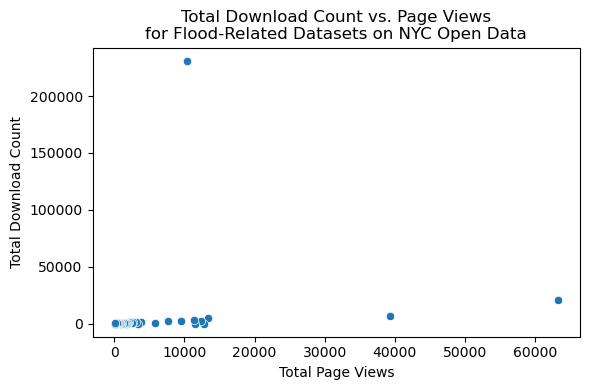

In [28]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(
    x=df['page_views_total'],
    y=df['download_count'],
    ax=ax
)

plt.title('Total Download Count vs. Page Views\nfor Flood-Related Datasets on NYC Open Data')
plt.xlabel('Total Page Views')
plt.ylabel('Total Download Count')

plt.tight_layout()

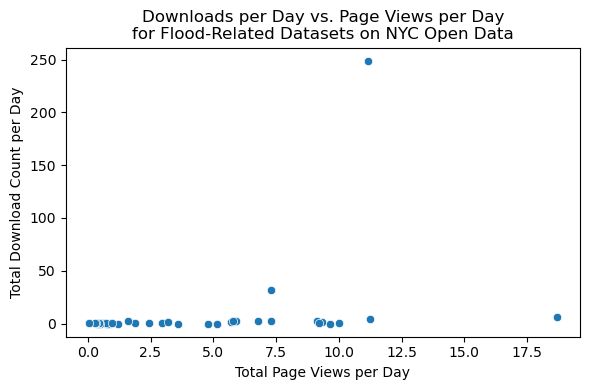

In [29]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(
    x=df['page_views_per_day'],
    y=df['download_per_day'],
    ax=ax
)

plt.title('Downloads per Day vs. Page Views per Day\nfor Flood-Related Datasets on NYC Open Data')
plt.xlabel('Total Page Views per Day')
plt.ylabel('Total Download Count per Day')

plt.tight_layout()

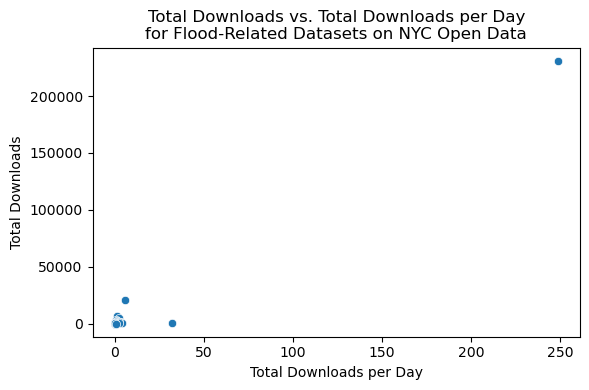

In [30]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(
    x=df['download_per_day'],
    y=df['download_count'],
    ax=ax
)

plt.title('Total Downloads vs. Total Downloads per Day\nfor Flood-Related Datasets on NYC Open Data')
plt.xlabel('Total Downloads per Day')
plt.ylabel('Total Downloads')

plt.tight_layout()

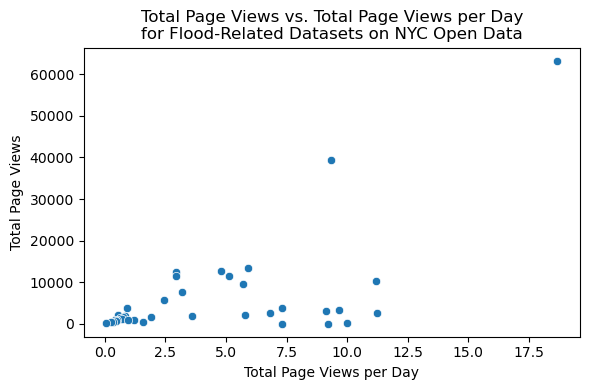

In [31]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.scatterplot(
    x=df['page_views_per_day'],
    y=df['page_views_total'],
    ax=ax
)

plt.title('Total Page Views vs. Total Page Views per Day\nfor Flood-Related Datasets on NYC Open Data')
plt.xlabel('Total Page Views per Day')
plt.ylabel('Total Page Views')

plt.tight_layout()